### Setup

In [ ]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
climate = pd.read_csv("./drive/MyDrive/Colaboratory Notebooks/WiDS22_Climate_Change/Data/train_clean.csv")
climate = climate.set_index("id")
climate.sample(3)

,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,...,facility_type_Education_Uncategorized,facility_type_Food_Sales,facility_type_Grocery_store_or_food_market,facility_type_Health_Care_Inpatient,facility_type_Health_Care_Outpatient_Clinic,facility_type_Health_Care_Outpatient_Uncategorized,facility_type_Industrial,facility_type_Laboratory,facility_type_Lodging_Dormitory_or_fraternity_sorority,facility_type_Lodging_Hotel,facility_type_Mixed_Use_Commercial_and_Residential,facility_type_Mixed_Use_Predominantly_Commercial,facility_type_Mixed_Use_Predominantly_Residential,facility_type_Multifamily_Uncategorized,facility_type_Nursing_Home,facility_type_Office_Bank_or_other_financial,facility_type_Office_Medical_non_diagnostic,facility_type_Office_Mixed_use,facility_type_Office_Uncategorized,facility_type_Parking_Garage,facility_type_Public_Assembly_Other,facility_type_Public_Assembly_Social_meeting,facility_type_Public_Safety_Courthouse,facility_type_Religious_worship,facility_type_Retail_Enclosed_mall,facility_type_Retail_Strip_shopping_mall,facility_type_Retail_Uncategorized,facility_type_Service_Uncategorized,facility_type_Service_Vehicle_service_repair_shop,facility_type_Warehouse_Distribution_or_Shipping_center,facility_type_Warehouse_Nonrefrigerated,facility_type_Warehouse_Refrigerated,facility_type_Warehouse_Selfstorage,facility_type_Warehouse_Uncategorized,Year_Factor_1,Year_Factor_2,Year_Factor_3,Year_Factor_4,Year_Factor_5,Year_Factor_6
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
46314,78646.00,1911.00,1.00,25.60,8,29.85,56,2,23.95,43,12,38.10,62,32,54.25,80,48,68.52,88,50,71.18,90,64,78.79,96,63,78.97,95,56,74.45,97,35,58.05,78,32,52.78,74,34,50.77,72,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
39207,97714.00,1935.00,12.00,42.70,4,28.60,58,9,31.62,56,13,37.66,66,31,52.33,77,49,64.00,86,55,72.45,89,63,76.15,91,61,74.52,90,52,69.73,92,42,59.63,77,22,45.30,69,24,40.52,65,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
47970,346000.00,1986.00,37.00,21.30,8,29.85,56,2,23.95,43,12,38.10,62,32,54.25,80,48,68.52,88,50,71.18,90,64,78.79,96,63,78.97,95,56,74.45,97,35,58.05,78,32,52.78,74,34,50.77,72,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# X variables (features) and y variable (target)
X = climate.drop(columns = ['site_eui'])
y = climate['site_eui']

## Feature Engineering


- Try dropping redundant features
- Use feature selection algorithms
- Tune parameters with features

### PCA to help determine predictive features

#### 111 features

- dummied 4 cateogrical features
- dropped 4 wind features
- dropped rows for values of na for 2 features (energy star rating and year built)
- dropped rows for values of 0 for year_built



In [ ]:
# Normalize for PCA
# Try using X set
from sklearn.preprocessing import StandardScaler
climate_z = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns, index = X.index)

In [ ]:
# PCA
from sklearn.decomposition import PCA
pcs = PCA().fit(climate_z)
pcs.explained_variance_ratio_

array([1.73087822e-01, 1.10210490e-01, 8.12790682e-02, 5.13724614e-02,
       3.70828363e-02, 2.75404608e-02, 2.37523496e-02, 1.94791270e-02,
       1.88257181e-02, 1.34601785e-02, 1.29111231e-02, 1.23425071e-02,
       1.14672384e-02, 1.05770197e-02, 9.91949285e-03, 9.60524311e-03,
       9.48348111e-03, 9.38558274e-03, 9.35714416e-03, 9.30753132e-03,
       9.29761533e-03, 9.28225153e-03, 9.24873457e-03, 9.23687315e-03,
       9.22773368e-03, 9.22552367e-03, 9.21277417e-03, 9.20617591e-03,
       9.19636161e-03, 9.19088446e-03, 9.18858918e-03, 9.18573774e-03,
       9.18533261e-03, 9.18179959e-03, 9.18047263e-03, 9.17909328e-03,
       9.17839926e-03, 9.17715072e-03, 9.17667138e-03, 9.17629632e-03,
       9.17559011e-03, 9.17485452e-03, 9.17260175e-03, 9.17141640e-03,
       9.16972471e-03, 9.15512426e-03, 9.11444323e-03, 9.02464483e-03,
       8.88919590e-03, 8.74539171e-03, 8.59425876e-03, 8.08866585e-03,
       7.41045196e-03, 7.10658746e-03, 5.54665986e-03, 5.24466414e-03,
      

In [ ]:
print(np.cumsum(pcs.explained_variance_ratio_))

[0.17308782 0.28329831 0.36457738 0.41594984 0.45303268 0.48057314
 0.50432549 0.52380461 0.54263033 0.55609051 0.56900163 0.58134414
 0.59281138 0.6033884  0.61330789 0.62291314 0.63239662 0.6417822
 0.65113934 0.66044687 0.66974449 0.67902674 0.68827548 0.69751235
 0.70674008 0.71596561 0.72517838 0.73438456 0.74358092 0.7527718
 0.76196039 0.77114613 0.78033146 0.78951326 0.79869373 0.80787283
 0.81705123 0.82622838 0.83540505 0.84458135 0.85375694 0.86293179
 0.87210439 0.88127581 0.89044553 0.89960066 0.9087151  0.91773975
 0.92662894 0.93537433 0.94396859 0.95205726 0.95946771 0.9665743
 0.97212096 0.97736562 0.98128095 0.98457864 0.9876446  0.99030366
 0.99228352 0.99390391 0.99503376 0.99597117 0.99680164 0.99753095
 0.99812952 0.99869075 0.99914166 0.99938539 0.99957179 0.99969337
 0.99976449 0.99982196 0.99986409 0.99989617 0.99992766 0.99994671
 0.99996115 0.99997126 0.99997769 0.99998272 0.99998681 0.99999047
 0.99999256 0.99999446 0.9999958  0.99999697 0.9999978  0.9999985

In [ ]:
# See what and how much features account for each component
loadings = pd.DataFrame(pcs.components_.T, 
                        columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12', 'PC13', 'PC14', 'PC15',
                                 'PC16', 'PC17', 'PC18', 'PC19','PC20', 'PC21','PC22', 'PC23','PC24', 'PC25','PC26', 'PC27', 'PC28', 'PC29', 'PC30',
                                 'PC31', 'PC32', 'PC33', 'PC34','PC35', 'PC36','PC37', 'PC38','PC39', 'PC40','PC41', 'PC42', 'PC43', 'PC44', 'PC45',
                                 'PC46', 'PC47', 'PC48', 'PC49','PC50', 'PC51','PC52', 'PC53','PC54', 'PC55','PC56', 'PC57', 'PC58', 'PC59', 'PC60',
                                 'PC61', 'PC62', 'PC63', 'PC64','PC65', 'PC66','PC67', 'PC68','PC69', 'PC70','PC71', 'PC72', 'PC73', 'PC74', 'PC75',
                                 'PC76', 'PC77', 'PC78', 'PC79','PC80', 'PC81','PC82', 'PC83','PC84', 'PC85','PC86', 'PC87', 'PC88', 'PC89', 'PC90',
                                 'PC91', 'PC92', 'PC93', 'PC94','PC95', 'PC96','PC97', 'PC98','PC99', 'PC100','PC101', 'PC102', 'PC103', 'PC104', 'PC105',
                                 'PC106', 'PC107', 'PC108', 'PC109', 'PC110'], 
                        index=X.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110
floor_area,-0.02,0.02,0.03,0.05,0.07,0.00,-0.12,-0.13,-0.02,0.22,-0.08,-0.15,0.45,0.26,-0.03,-0.13,-0.07,-0.02,-0.02,0.01,-0.02,-0.01,0.00,0.00,-0.00,-0.01,-0.01,0.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
year_built,0.01,0.05,0.01,-0.01,-0.03,-0.06,0.12,-0.04,0.14,-0.07,-0.11,0.23,0.44,0.14,-0.22,0.17,0.04,-0.06,0.02,-0.01,-0.01,0.02,0.00,0.01,0.01,0.00,-0.00,0.01,0.00,-0.01,-0.02,0.00,-0.00,-0.00,0.00,0.01,-0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
energy_star_rating,0.04,-0.00,0.02,0.02,-0.00,-0.02,-0.07,-0.05,-0.03,0.09,0.03,-0.48,-0.15,0.04,-0.17,0.17,-0.12,-0.05,0.05,-0.02,-0.00,0.03,0.01,0.01,0.01,0.00,-0.00,0.02,0.02,-0.02,0.00,0.00,0.01,-0.00,0.01,-0.00,-0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00
ELEVATION,-0.05,0.18,0.10,0.09,-0.08,0.18,-0.06,-0.17,-0.02,0.03,-0.01,0.04,-0.03,-0.06,-0.01,-0.00,0.00,-0.02,0.03,-0.01,-0.02,0.00,-0.02,0.01,-0.01,0.00,-0.00,-0.01,-0.01,-0.00,-0.00,0.00,0.01,-0.00,0.00,0.00,-0.01,-0.01,0.01,-0.01,...,-0.02,0.03,-0.01,0.01,-0.00,-0.01,-0.01,-0.01,0.01,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
january_min_temp,0.21,-0.06,-0.04,0.01,-0.09,-0.05,0.01,0.06,0.00,-0.03,-0.00,-0.03,0.04,-0.01,0.00,-0.01,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,...,0.22,-0.06,0.41,-0.16,-0.05,-0.00,0.01,0.02,0.02,-0.16,-0.10,0.28,-0.12,0.11,-0.12,-0.11,0.27,0.20,-0.04,0.04,-0.18,0.06,-0.30,0.12,-0.03,-0.10,0.04,0.07,0.18,0.19,0.09,-0.04,-0.12,-0.17,0.00,0.04,0.02,0.07,0.09,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year_Factor_2,0.04,-0.04,0.04,0.04,0.08,-0.10,-0.04,-0.19,-0.11,0.26,-0.43,0.18,-0.30,0.33,0.15,0.05,0.05,0.03,-0.02,-0.02,0.03,0.01,-0.01,-0.01,-0.01,0.01,0.01,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,...,-0.05,0.10,-0.08,-0.13,-0.06,-0.09,-0.10,-0.03,0.04,-0.07,-0.07,0.01,-0.06,-0.00,-0.03,0.04,-0.07,-0.03,-0.02,0.02,-0.10,-0.07,-0.08,-0.04,0.07,0.00,-0.01,-0.10,0.06,-0.00,-0.10,0.02,-0.13,0.05,-0.03,-0.10,-0.02,0.09,0.09,-0.09
Year_Factor_3,0.03,0.02,0.05,0.09,0.17,-0.11,0.05,0.34,-0.05,0.42,0.14,0.02,0.12,-0.28,0.06,0.06,-0.01,0.02,-0.01,0.01,-0.01,-0.01,0.01,0.03,0.01,0.00,0.00,-0.00,0.01,0.01,-0.01,0.00,-0.00,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,0.00,...,0.23,0.06,0.05,-0.01,0.07,-0.00,-0.19,-0.10,-0.03,-0.05,0.07,-0.04,-0.07,-0.02,0.10,-0.14,-0.10,0.00,0.06,0.03,-0.00,-0.08,0.00,0.01,0.14,0.10,-0.12,-0.02,0.01,0.01,-0.10,-0.01,-0.17,0.11,0.01,-0.07,-0.04,0.11,0.08,-0.05
Year_Factor_4,-0.03,0.02,-0.14,-0.01,0.29,0.31,0.1

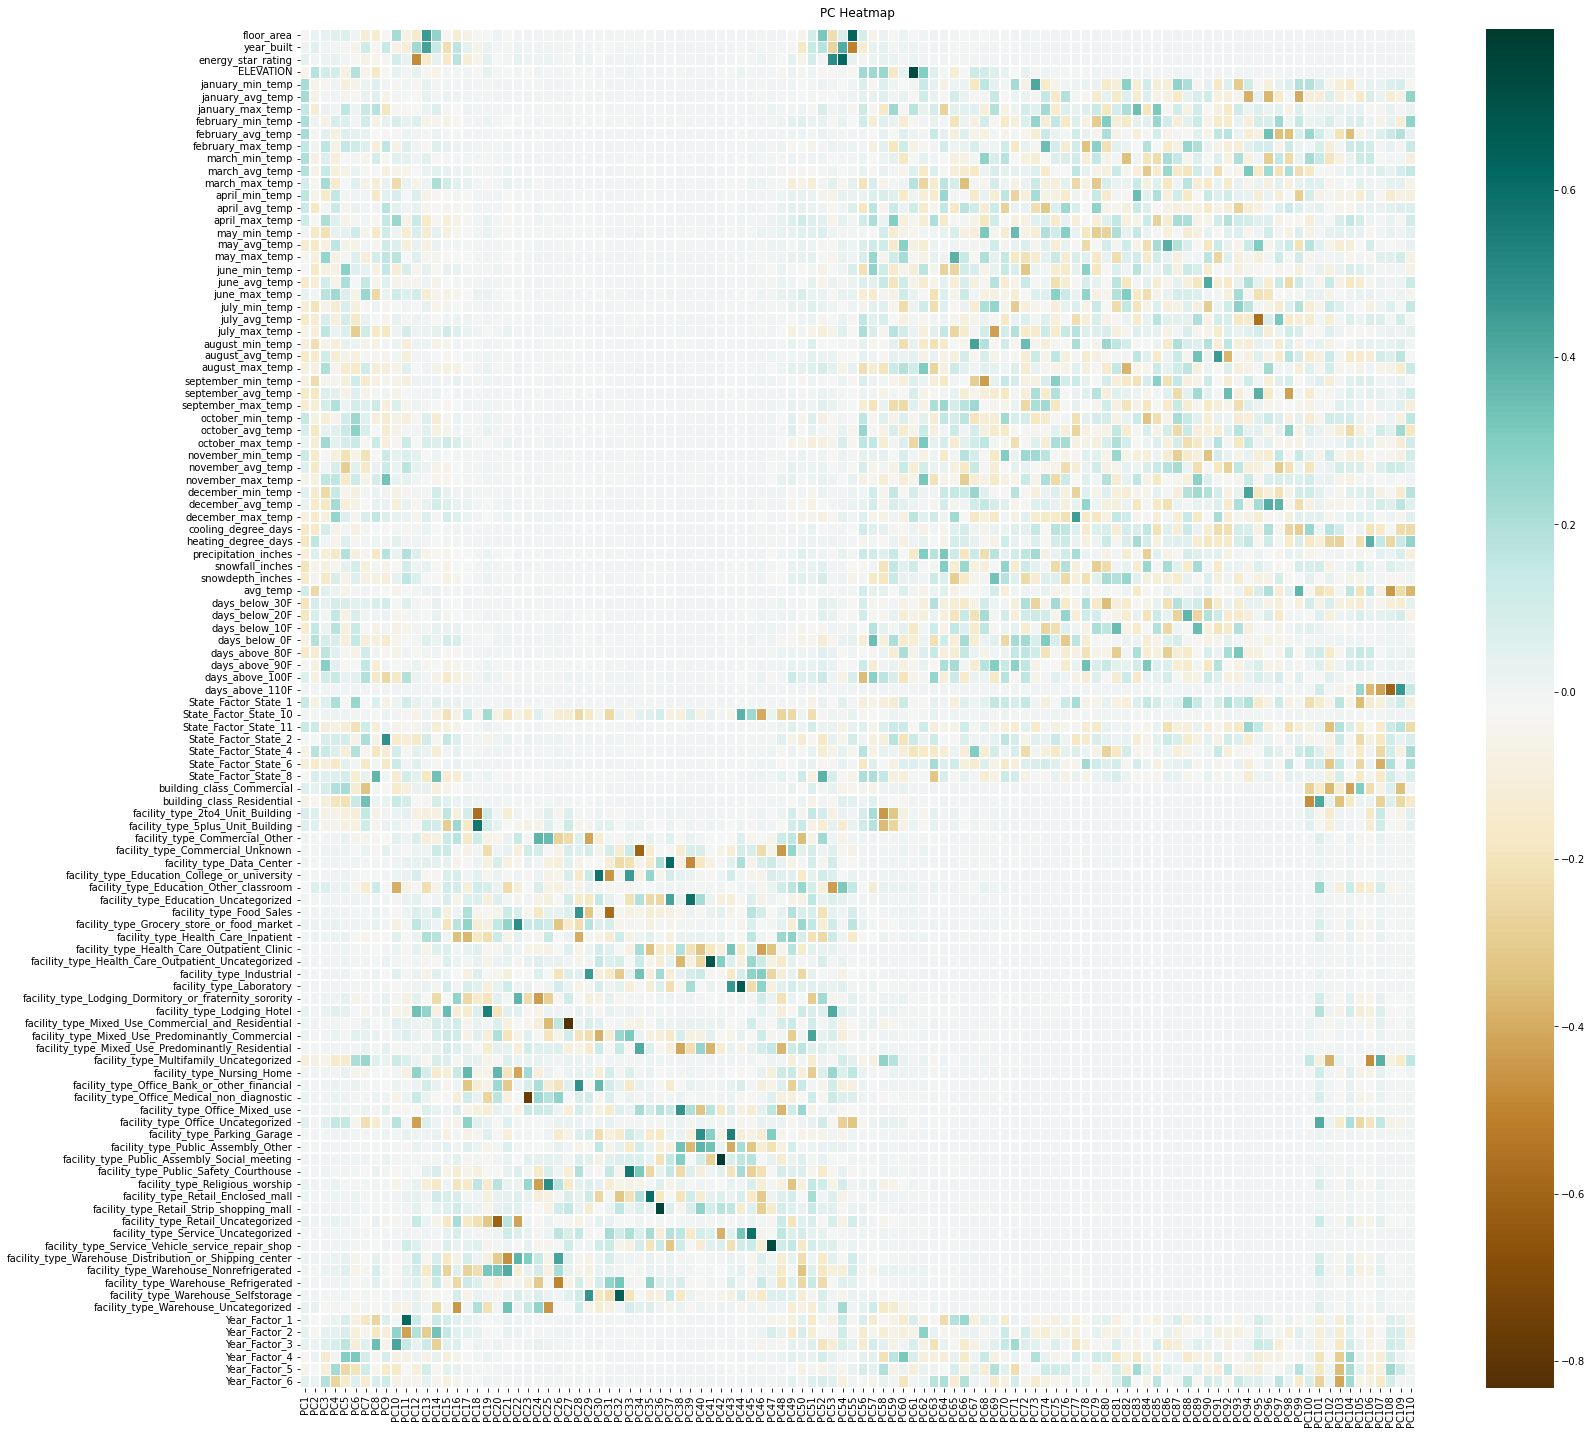

In [ ]:
plt.figure(figsize=(25, 25))

heatmap = sns.heatmap(loadings, linewidth=.5, cmap='BrBG')
heatmap.set_title('PC Heatmap', fontdict={'fontsize':12}, pad=12);

plt.savefig('pc_heatmap_110_features.png', dpi=180, bbox_inches='tight')

In [ ]:
list(climate.columns)

['floor_area',
 'year_built',
 'energy_star_rating',
 'ELEVATION',
 'january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_below_0F',
 'day

#### Reduce features (73 features)

- Use PCA results of 111 features
- Use domain knowledge and background research
- With and without site eui
- Redundant temperature features

**Domain knowledge**

*Temprature covariates*
- min, max, avg temp for month, total avg temp gives variability in temp, only avg caputures some of duration
- days below and days above a temp gives a count (frequency/duration of temp) with the significant variability range captured
- heating and cooling days - useful since heating generally takes more energy than cooling, more heating days than cooling days


In [ ]:
# for i in list(climate.columns):
#   print(i)
print(len(climate.columns))

111


In [ ]:
# Drop features? (aim for < 20 total)
# Drop y variable for pca?
climate_clean = climate.drop(columns = [
 'january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp', 
 'facility_type_Mixed_Use_Predominantly_Residential',
 'facility_type_Multifamily_Uncategorized',
 ])
# 'site_eui'

In [ ]:
# Count columns
print(len(climate_clean.columns))

73


In [ ]:
climate_clean_z = pd.DataFrame(StandardScaler().fit_transform(climate_clean), columns = climate_clean.columns, index = climate_clean.index)
# How much variability explained by each component
pcs = PCA().fit(climate_clean_z)
pcs.explained_variance_ratio_

array([1.05403307e-01, 6.39311327e-02, 5.41145813e-02, 3.74295642e-02,
       3.08135417e-02, 2.44072138e-02, 2.09157825e-02, 2.07836559e-02,
       1.84219687e-02, 1.70270019e-02, 1.62194611e-02, 1.51290969e-02,
       1.48787746e-02, 1.47126559e-02, 1.45326612e-02, 1.44141678e-02,
       1.43212076e-02, 1.42907156e-02, 1.42396049e-02, 1.42196812e-02,
       1.41956309e-02, 1.41724857e-02, 1.41622121e-02, 1.41559539e-02,
       1.41356261e-02, 1.41192868e-02, 1.41157097e-02, 1.41057985e-02,
       1.41032488e-02, 1.41005766e-02, 1.40983126e-02, 1.40947651e-02,
       1.40903759e-02, 1.40892093e-02, 1.40876661e-02, 1.40868895e-02,
       1.40865462e-02, 1.40857206e-02, 1.40854254e-02, 1.40823461e-02,
       1.40782154e-02, 1.40562666e-02, 1.39612705e-02, 1.39083587e-02,
       1.38494518e-02, 1.37080871e-02, 1.32035252e-02, 1.21491182e-02,
       1.17517006e-02, 1.11162450e-02, 1.02850484e-02, 9.54858760e-03,
       8.34487324e-03, 4.38883925e-03, 3.68137366e-03, 3.12352370e-03,
      

In [ ]:
# How much variability explained total at each component
print(np.cumsum(pcs.explained_variance_ratio_))

[0.10540331 0.16933444 0.22344902 0.26087859 0.29169213 0.31609934
 0.33701512 0.35779878 0.37622075 0.39324775 0.40946721 0.42459631
 0.43947508 0.45418774 0.4687204  0.48313457 0.49745578 0.51174649
 0.5259861  0.54020578 0.55440141 0.56857389 0.58273611 0.59689206
 0.61102769 0.62514697 0.63926268 0.65336848 0.66747173 0.68157231
 0.69567062 0.70976538 0.72385576 0.73794497 0.75203264 0.76611952
 0.78020607 0.79429179 0.80837722 0.82245956 0.83653778 0.85059405
 0.86455532 0.87846367 0.89231313 0.90602121 0.91922474 0.93137386
 0.94312556 0.9542418  0.96452685 0.97407544 0.98242031 0.98680915
 0.99049052 0.99361405 0.99556356 0.99686737 0.99795981 0.9987817
 0.99924561 0.99958626 0.9998032  0.99992359 0.99998301 0.99999964
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
# What and how much features account for each component
loadings = pd.DataFrame(pcs.components_.T, 
                        columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12', 'PC13', 'PC14', 'PC15',
                                 'PC16', 'PC17', 'PC18', 'PC19','PC20', 'PC21','PC22', 'PC23','PC24', 'PC25','PC26', 'PC27', 'PC28', 'PC29', 'PC30',
                                 'PC31', 'PC32', 'PC33', 'PC34','PC35', 'PC36','PC37', 'PC38','PC39', 'PC40','PC41', 'PC42', 'PC43', 'PC44', 'PC45',
                                 'PC46', 'PC47', 'PC48', 'PC49','PC50', 'PC51','PC52', 'PC53','PC54', 'PC55','PC56', 'PC57', 'PC58', 'PC59', 'PC60',
                                 'PC61', 'PC62', 'PC63', 'PC64','PC65', 'PC66','PC67', 'PC68','PC69', 'PC70','PC71', 'PC72'], 
                        index=climate_clean.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72
floor_area,0.04,0.07,0.08,-0.12,0.00,-0.14,0.36,-0.07,0.09,-0.30,0.24,-0.21,-0.01,0.13,-0.01,0.05,-0.00,-0.01,-0.00,0.02,-0.01,-0.01,-0.01,-0.00,-0.01,-0.00,0.01,-0.00,0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.01,0.03,0.00,0.01,0.01,0.13,0.27,-0.35,-0.02,0.03,0.07,0.61,0.00,0.02,-0.01,0.01,0.00,-0.02,0.01,-0.00,-0.01,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
year_built,-0.00,0.08,-0.08,0.09,-0.07,0.22,0.22,-0.00,0.38,-0.09,0.18,-0.04,-0.22,-0.10,-0.01,-0.01,-0.07,-0.02,-0.04,0.03,-0.01,0.01,-0.00,-0.01,-0.01,0.00,0.01,-0.01,0.00,-0.01,-0.00,-0.01,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.01,0.00,0.00,0.01,-0.01,0.03,-0.06,0.16,0.43,-0.15,-0.01,-0.27,-0.28,-0.49,0.00,0.02,0.03,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
energy_star_rating,-0.06,0.04,0.03,-0.03,0.04,-0.12,0.11,-0.12,-0.48,-0.01,0.09,0.08,-0.13,-0.04,-0.15,-0.01,-0.08,-0.01,-0.05,0.02,0.00,0.02,-0.00,-0.00,-0.02,-0.01,0.02,0.00,-0.01,0.01,0.00,-0.01,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.01,0.01,-0.01,-0.01,0.06,-0.02,0.05,0.19,0.26,0.68,-0.24,-0.13,0.04,-0.01,0.03,0.01,0.00,0.01,0.00,-0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00
ELEVATION,0.16,0.32,0.02,0.11,0.03,-0.22,0.04,0.06,0.04,0.07,-0.01,0.06,0.03,-0.02,0.01,0.01,-0.01,0.00,-0.00,-0.02,-0.00,0.02,0.02,0.00,-0.00,0.00,-0.02,0.01,-0.01,0.00,0.00,-0.01,-0.00,-0.00,0.00,0.01,-0.00,-0.00,-0.00,0.01,-0.01,-0.03,-0.06,0.01,0.01,0.01,-0.04,-0.05,-0.01,0.00,0.00,0.02,-0.02,0.42,0.42,0.58,0.27,-0.00,0.13,-0.02,0.06,-0.02,-0.04,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,-0.00
cooling_degree_days,0.18,-0.28,0.27,0.10,-0.13,0.03,0.03,-0.15,0.01,-0.03,-0.01,-0.00,-0.00,-0.01,0.00,0.01,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.01,-0.00,-0.00,0.01,0.00,-0.00,0.00,0.04,0.00,0.02,0.00,-0.04,0.07,-0.02,0.11,-0.00,0.16,-0.28,-0.00,0.07,-0.18,-0.18,-0.15,0.14,-0.08,0.19,0.60,-0.36,0.00,0.00,-0.00,0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year_Factor_2,-0.09,0.01,0.10,-0.08,-0.02,-0.13,0.04,-0.10,0.13,-0.39,-0.28,0.38,-0.19,0.22,0.07,-0.05,-0.00,-0.02,0.01,-0.04,-0.02,-0.00,0.01,-0.02,-0.00,-0.00,-0.01,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.01,-0.03,0.18,0.04,-0.18,0.15,-0.38,-0.15,0.06,-0.20,-0.15,-0.02,-0.04,-0.06,-0.04,0.20,0.10,0.03,-0.01,-0.03,-0.11,0.07,0.07,-0.09,0.05,-0.00,-0.17,-0.13,0.00,-0.00,0.04
Year_Factor_3,-0.06,0.06,0.08,-0.18,-0.08,0.17,-0.14,0.10,-0.08,-0.32,0.27,0.02,0.40,-0.27,-0.07,-0.03,0.08,0.02,0.02,0.04,0.00,-0.00,0.00,0.04,0.01,-0.00,-0.01,-0.01,0.01,-0.01,0.01,0.01,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.01,-0.01,0.06,-0.05,-0.17,0.31,-0.08,-0.09,0.08,-0.11,-0.37,-0.05,0.02,0.08,0.02,0.02,0.06,0.17,0.04,0.04,-0.16,-0.03,0.07,-0.06,-0.04,-0.03,0.00,-0.21,-0.16,0.00,-0.00,0.05
Year_Factor_4,0.08,-0.07,-0.14,-0.27,0.06,-0.01,0.10,0.55,-0.02,0.10,-0.16,-0.01,-0.16,0.06,0.01,0.05,-0.02,-0.01,0.00,-0.00,0.01,0.01,-0.01,0.01,-0.01,-0.00,-0.03,0.01,-0.01,-0.00,-0.02,-0.01,0.01,-0.01,0.00,0.00,-0.00,0.00,0.00,0.00,-0.03,-0.03,-0.01,0.02,0.02,-0.15,-0.13,0.10,-0.07,0.07,-0.12,0.20,-0.01,0.13,0.00,-0.02,-0.27,-0.14,0.15,0.04,-0.13,0.02,-0.09,-0.09,0.07,-0.02,0.00,-0.37,-0.28,0.01,-0.01,0.08
Year_Factor_5,0.07,-0.00,0.01,0.13,0.48,0.30,-0.00,-0.39,-0.03,-0.03

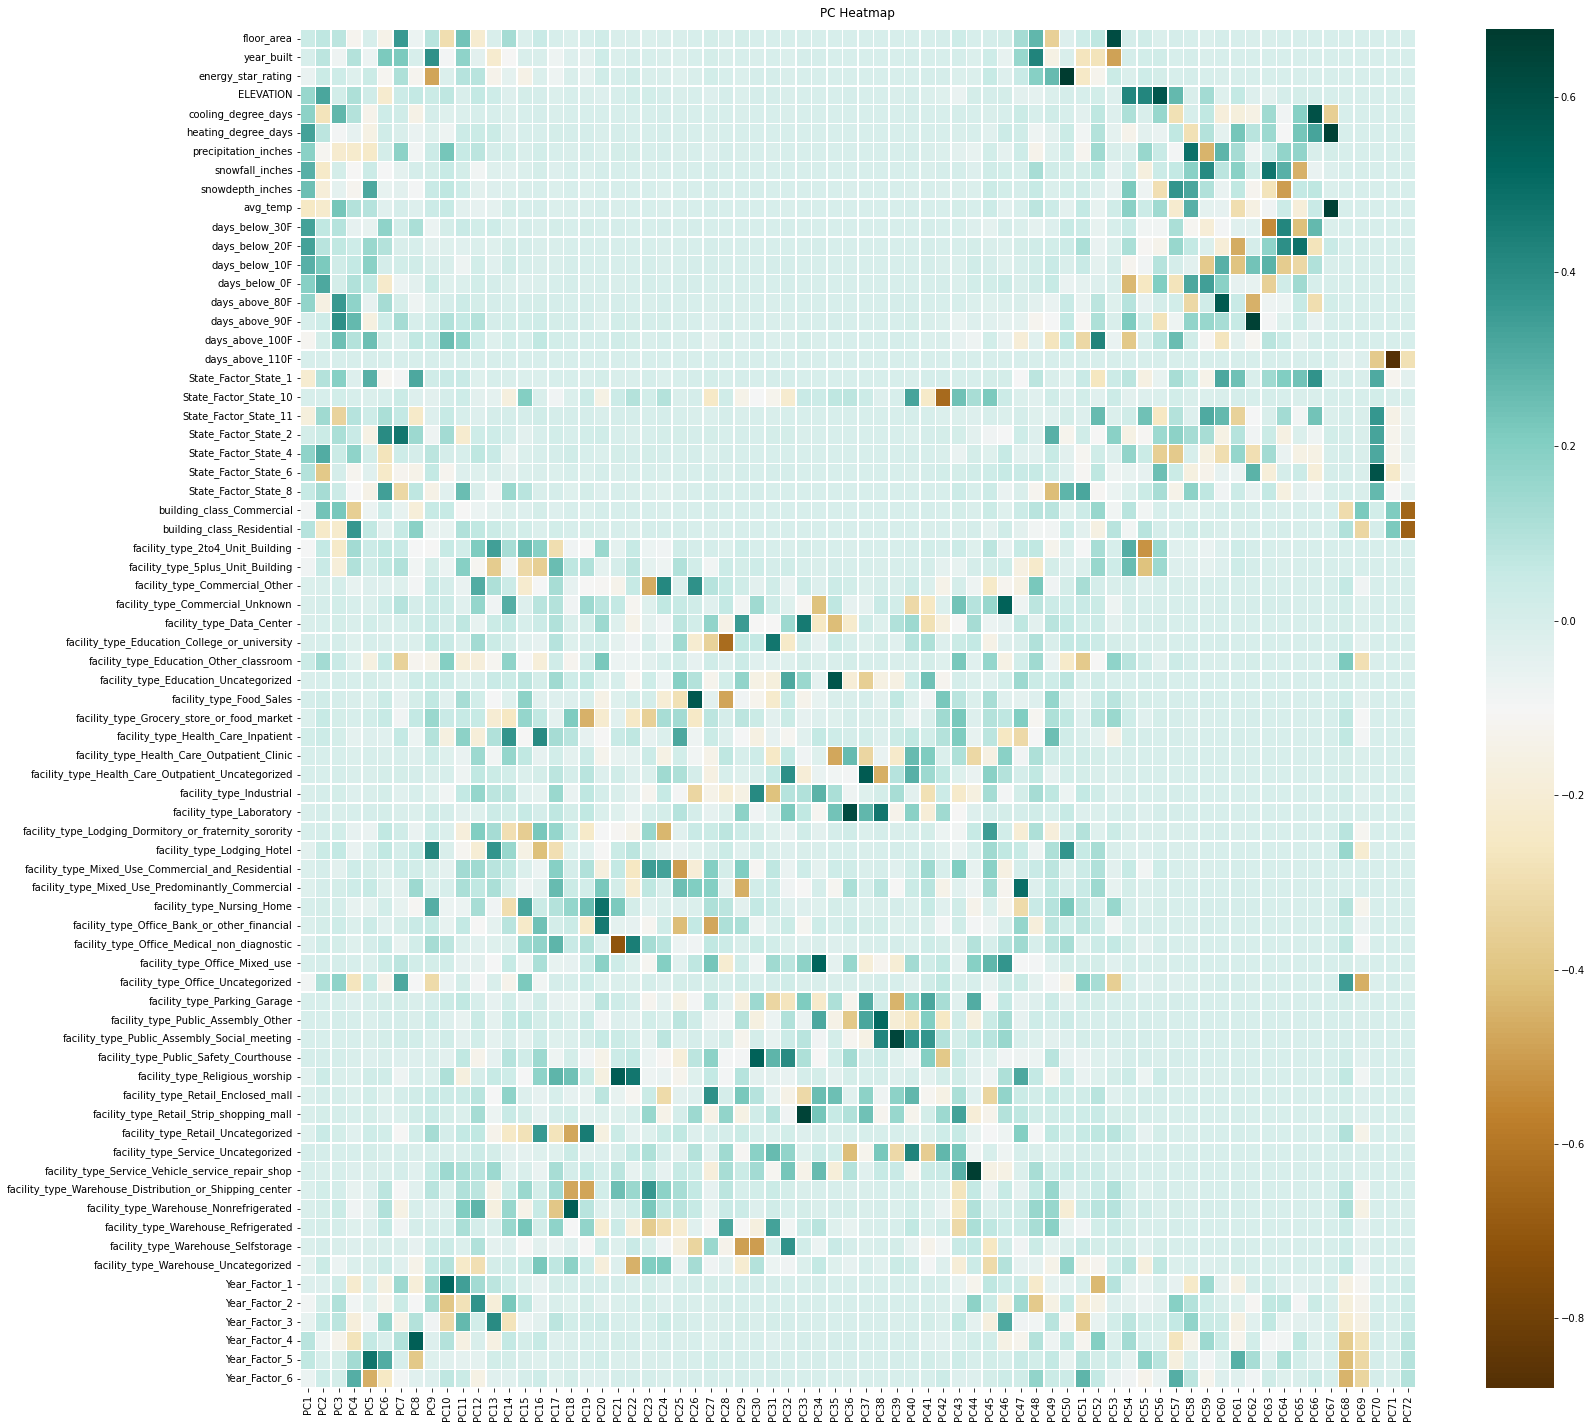

In [ ]:
plt.figure(figsize=(25, 25))

heatmap = sns.heatmap(loadings, linewidth=.5, cmap='BrBG')
heatmap.set_title('PC Heatmap', fontdict={'fontsize':12}, pad=12);

plt.savefig('pc_heatmap_72_features.png', dpi=180, bbox_inches='tight')

When site eui was dropped the variance explained by all the features increased for all the components. (This means site_eui holds weight and when removed, it gave its weight to the other features.)

### Output

In [ ]:
# Export feature engineered csv (climate_clean)
climate_clean.to_csv('./train_reduce.csv')